In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns; sns.set_theme()
import os
import math
import powerlaw as pl
import scipy
from statsmodels.distributions.empirical_distribution import ECDF
import networkx as nx
import ipywidgets as widgets 
import functions
from scipy.stats import entropy
from collections import defaultdict

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
os.chdir('../')
from portrait.portrait_divergence import portrait_divergence
os.chdir('../')

In [4]:
print(os.getcwd())
dimensions = 50
agents = 100
evaluations = 100000
folder = f'analysis_interaction_graph/{dimensions}d/gwo_results/'
simu_size = int(input("Simulation size: ")) #10

/home/rcls/codigos/git-projects/interaction-network-examples
Simulation size: 10


In [5]:
#results_dict = {}
funcs = ['Rosenbrock', 'Rastrigin']
algos = ['GWO']
intypes = ['euclidian']
results = defaultdict(dict)
for intype in intypes:
    for algo in algos:
        results[intype][algo] = defaultdict(dict)
        for func in funcs:
            results_file = f"{algo}_{func}_intype_{intype}_improved_False_init_Uniform_it_1000_dim_{dimensions}_swarm_{agents}_eval_{evaluations}_sim_%02d_interaction_graph.txt"
            simu_path_pattern = folder+results_file 
            results[intype][algo][func]['data'] = functions.parse_files(simu_size, simu_path_pattern)

# Portrait Divergence and Kullback Divergence

In [6]:
radioData = widgets.RadioButtons(
    options=['data_normalized', 'data'],
    value='data_normalized', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Valor Normalizado ou Bruto:',
    disabled=False
)

radioData

RadioButtons(description='Valor Normalizado ou Bruto:', options=('data_normalized', 'data'), value='data_norma…

In [7]:
data_key = radioData.value

for intype in intypes:
    for algo in algos:
        for func in funcs:
            #port_div = np.zeros((simu_size,simu_size))
            results[intype][algo][func]['pd'] = np.zeros((simu_size,simu_size))
            #kull_div = np.zeros((simu_size,simu_size))
            results[intype][algo][func]['kd'] = np.zeros((simu_size,simu_size))
            for sim1 in range(0, simu_size):
                for sim2 in range(0, simu_size):
                    result_sim1 = results[intype][algo][func]['data'][sim1][data_key]
                    result_sim2 = results[intype][algo][func]['data'][sim2][data_key]
                    results[intype][algo][func]['pd'][sim1][sim2] = portrait_divergence(result_sim1, result_sim2)
                    results[intype][algo][func]['kd'][sim1][sim2] = entropy(np.hstack(result_sim1), np.hstack(result_sim2))

In [8]:
heatmap_folder=folder+"/nb-pd-eq/"
if not os.path.exists(heatmap_folder):
    os.makedirs(heatmap_folder)

#filename = results_file.replace("sim_%02d_interaction_graph.txt", "pd.png") 
#plt.figure(figsize=(15,10))

pd euclidian Rosenbrock
0 0
pd euclidian Rastrigin
0 1
kd euclidian Rosenbrock
1 0
kd euclidian Rastrigin
1 1


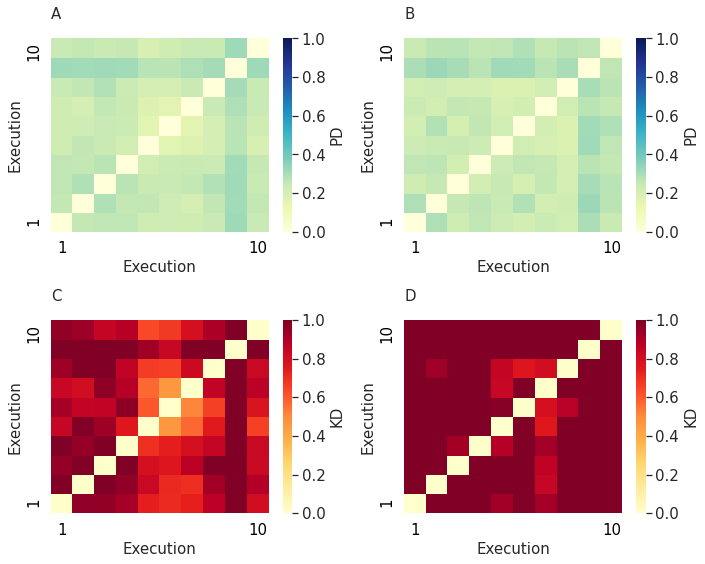

In [9]:

fig, axs = plt.subplots(ncols=len(funcs), nrows=2, figsize=(10,8))
font_size_out = 10

intype='euclidian'
metric = ['pd', 'kd']
algo = 'GWO'

label = ord('A')

for line, metric in enumerate(metric):
    for col, func in enumerate(funcs):
        print(metric, intype, func)
        print(line, col)
        my_x = 0
        my_y = 1.1
        
        
        axs[line, col].text(my_x,my_y,f"{chr(label)}",fontsize=1.5*font_size_out,transform=axs[line, col].transAxes,\
                bbox=dict(edgecolor='none', facecolor='w', alpha=0.5))
        if metric == 'pd':
            if col==0:
                showcbar=True
            axs[line, col] = sns.heatmap(results[intype][algo][func][metric], cmap="YlGnBu", vmin=0, vmax=1,xticklabels=True, 
                             yticklabels=True, cbar=showcbar, ax=axs[line, col],
                            annot=False, annot_kws={"fontsize":font_size_out*1.5}, cbar_kws ={'label': 'PD'})
            showcbar=True
            axs[line, col].figure.axes[-1].yaxis.label.set_size(font_size_out*1.5)

        elif metric == 'kd':
            if col==0:
                showcbar=True
                
            axs[line, col] = sns.heatmap(results[intype][algo][func][metric], cmap="YlOrRd", vmin=0, vmax=1,xticklabels=True, 
                         yticklabels=True, cbar=showcbar, ax=axs[line, col],
                         annot=False, annot_kws={"fontsize":font_size_out*1.5}, cbar_kws = {'label': 'KD'})
            axs[line, col].figure.axes[-1].yaxis.label.set_size(font_size_out*1.5)

            showcbar=True
        axs[line, col].invert_yaxis()
        
        tam = len(results[intype][algo][func][metric])
        labels = [""] * tam
        labels[0]= '1'
        labels[-1]= f'{tam}'
        axs[line,col].set_xticklabels(labels)
        axs[line,col].set_yticklabels(labels)
        axs[line,col].set_xlabel("Execution", fontsize=font_size_out*1.5)
        axs[line,col].set_ylabel("Execution", fontsize=font_size_out*1.5)
        cax = plt.gcf().axes[-1]
        cax.tick_params(labelsize=font_size_out*1.5)

        axs[line,col].tick_params('x', colors="black", labelsize=font_size_out*1.5)
        axs[line,col].tick_params('y', colors="black", labelsize=font_size_out*1.5)
        label+=1
        
filename = f"PD_KD_SIMU_{algo}_{intype}.png"
plt.tight_layout()
plt.show()
#plt.savefig(heatmap_folder+filename)

In [10]:
print('Max')
print(results[intype][algo]['Rastrigin']['kd'].max())
print(results[intype][algo]['Rosenbrock']['kd'].max())

print('Min')
print(results[intype][algo]['Rastrigin']['kd'].min())
print(results[intype][algo]['Rosenbrock']['kd'].min())

print ("Mean")
print(results[intype][algo]['Rastrigin']['kd'].mean())
print(results[intype][algo]['Rosenbrock']['kd'].mean())

Max
2.604006672566937
1.3804180982285617
Min
0.0
0.0
Mean
1.2498634139211813
0.8098663771200052


pd euclidian Rosenbrock
0 0
pd euclidian Rastrigin
0 1


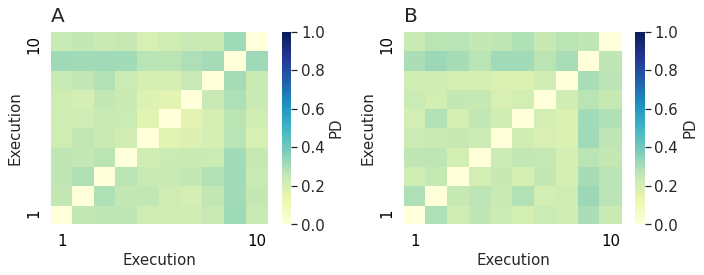

<Figure size 432x288 with 0 Axes>

In [11]:

fig, axs = plt.subplots(ncols=len(funcs), nrows=1, figsize=(10,4))
font_size_out = 10

intype='euclidian'
metric = ['pd']
algo = 'GWO'

#fig.suptitle('Sharing x per column, y per row')

for line, metric in enumerate(metric):
    for col, func in enumerate(funcs):
        print(metric, intype, func)
        print(line, col)
        my_x = -0.0 #-0.1
        my_y = 1.05
        
        if func == 'Rosenbrock':
            label = 'A'
        elif func == 'Rastrigin':
            label = 'B'
        
        axs[col].text(my_x,my_y,f"{label}",fontsize=2*font_size_out,transform=axs[col].transAxes,\
                bbox=dict(edgecolor='none', facecolor='w', alpha=0.5))
        if metric == 'pd':
            if col==0:
                showcbar=True
            axs[col] = sns.heatmap(results[intype][algo][func][metric], cmap="YlGnBu", vmin=0, vmax=1,xticklabels=True, 
                             yticklabels=True, cbar=showcbar, ax=axs[col],
                            annot=False, annot_kws={"fontsize":font_size_out*3}, cbar_kws ={'label': 'PD'})
            showcbar=True
            axs[col].figure.axes[-1].yaxis.label.set_size(font_size_out*1.5)

        elif metric == 'kd':
            if col==0:
                showcbar=True
                
            axs[col] = sns.heatmap(results[intype][algo][func][metric], cmap="YlOrRd", vmin=0, vmax=1,xticklabels=True, 
                         yticklabels=True, cbar=showcbar, ax=axs[col],
                         annot=False, annot_kws={"fontsize":font_size_out*3}, cbar_kws = {'label': 'KD'})
            axs[col].figure.axes[-1].yaxis.label.set_size(font_size_out*1.5)

            showcbar=True
        axs[col].invert_yaxis()
        
        tam = len(results[intype][algo][func][metric])
        labels = [""] * tam
        labels[0]= '1'
        labels[-1]= f'{tam}'
        axs[col].set_xticklabels(labels)
        axs[col].set_yticklabels(labels)
        axs[col].set_xlabel("Execution", fontsize=font_size_out*1.5)
        axs[col].set_ylabel("Execution", fontsize=font_size_out*1.5)
        cax = plt.gcf().axes[-1]
        cax.tick_params(labelsize=font_size_out*1.5)

        axs[col].tick_params('x', colors="black", labelsize=font_size_out*1.5)
        axs[col].tick_params('y', colors="black", labelsize=font_size_out*1.5)

filename = f"PD_KD_SIMU_{algo}_euclidian.png"
plt.tight_layout()
plt.show()
plt.savefig(heatmap_folder+filename)

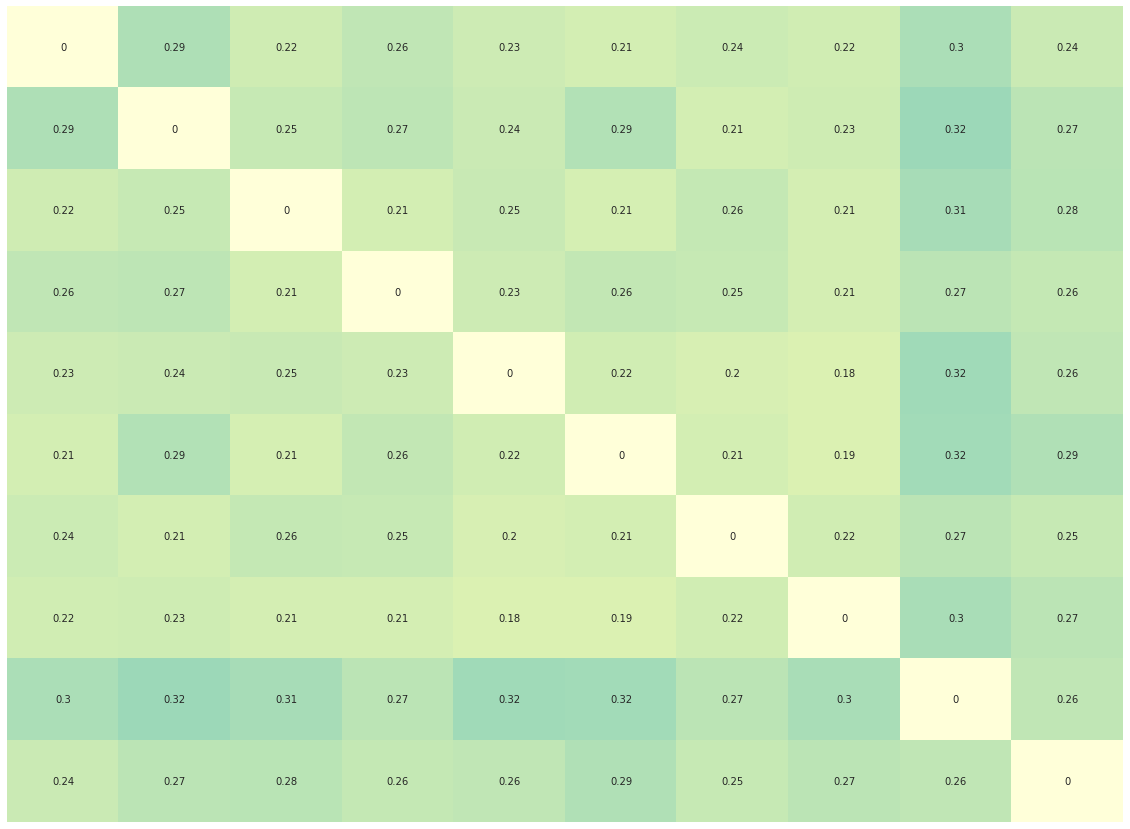

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(results['euclidian']['GWO']['Rastrigin']['pd'], cmap="YlGnBu", vmin=0, vmax=1,xticklabels=False, 
                             yticklabels=False, cbar=False, annot=True, annot_kws={"fontsize":font_size_out})

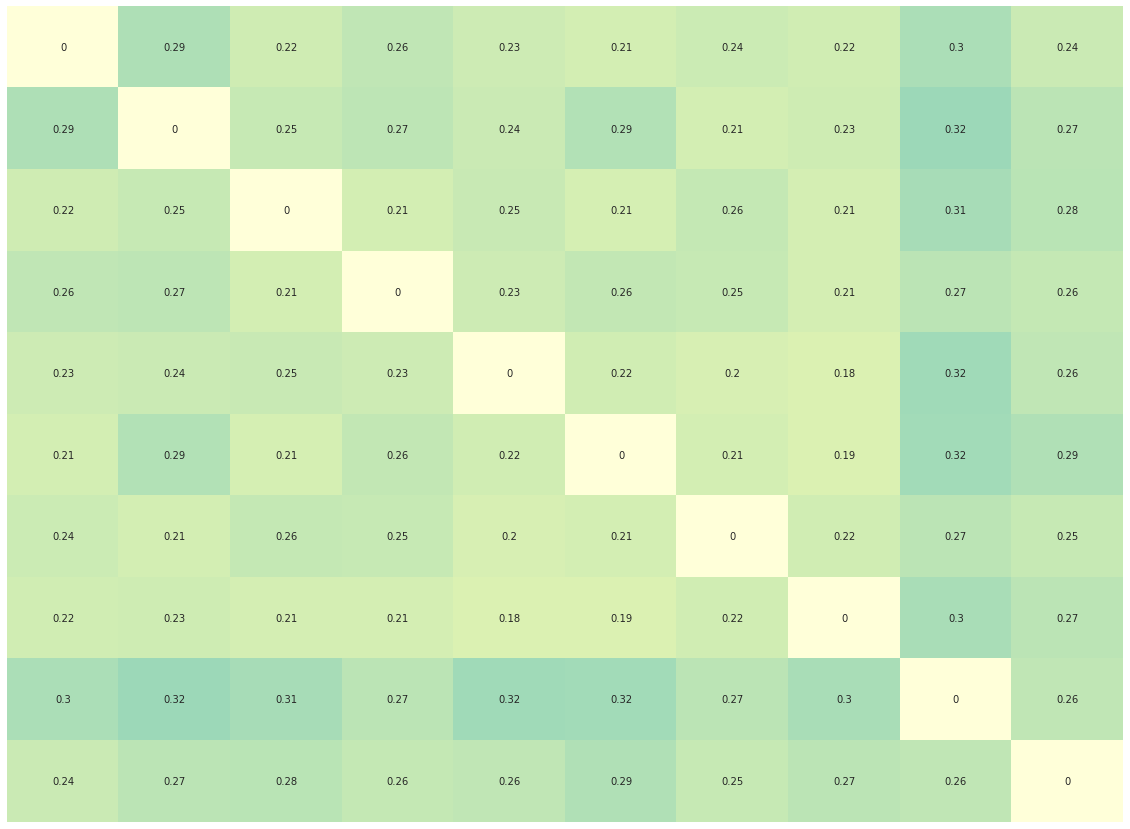

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(results['euclidian']['GWO']['Rastrigin']['pd'], cmap="YlGnBu", vmin=0, vmax=1,xticklabels=False, 
                             yticklabels=False, cbar=False, annot=True, annot_kws={"fontsize":font_size_out})